In [1]:
#import dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
from scipy.stats import sem

In [2]:
#read in csv and merge
salaries = pd.read_csv('Resources/salaries_06302020_high_school.csv')
schools = pd.read_csv('Resources/School_Progress_Reports_SY1819_retention_rts.csv', encoding='iso-8859-1')
combined_df = pd.merge(salaries, schools, on = "School_ID", how = "left")

salaries2 = pd.read_csv('Resources/salaries_06302020_nbrhd_magnet_select.csv', encoding='latin-1')
combined2_df = pd.merge(salaries2, schools, on = "School_ID", how = "left")

In [3]:
#partition data by school type
Magnet_high = combined2_df.loc[(combined2_df['School_Type']== "Magnet")]
Selective_high = combined2_df.loc[(combined2_df['School_Type']== "Selective enrollment")]
Neighborhood_sal = combined_df.loc[(combined_df['School_Type']== "Neighborhood")]


# Is performance different at Charter Schools?

In [4]:
schools.groupby(schools["School_Type"])['School_ID'].count()

School_Type
Charter                 65
Magnet                   7
Neighborhood            46
Selective enrollment    11
Name: School_ID, dtype: int64

In [5]:
#Attainment / Grad / etc
One_df = schools[["School_Type", 'Long_Name', 'Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct', 'Growth_PSAT_Math_Grade_10_School_Pct','Growth_SAT_Grade_11_School_Pct','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2', 'Teacher_Retention', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1']]
One_df = One_df.dropna()
One_df = One_df.loc[One_df["Teacher_Retention"] != 'NAN']
One_df['Teacher_Retention'] = pd.to_numeric(One_df['Teacher_Retention'])
variables = ['Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']

for var in variables:
    One_df[var] = pd.to_numeric(One_df[var])
Ret = One_df.groupby(One_df["School_Type"])['Teacher_Retention', 'Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct', 'Growth_PSAT_Math_Grade_10_School_Pct','Growth_SAT_Grade_11_School_Pct','Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1'].mean()
Ret

,Teacher_Retention,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Pct,Growth_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1
School_Type,,,,,,,,,,,,
Charter,0.453043,68.652174,88.391304,47.826087,68.956522,33.395652,41.626087,33.752174,78.043478,78.691304,81.456522,82.865217
Magnet,0.862500,48.250000,60.250000,23.500000,32.750000,36.475000,40.900000,42.475000,83.225000,80.100000,87.575000,83.950000
Neighborhood,0.844872,39.666667,68.564103,23.692308,27.051282,20.715385,25.584615,28.510256,67.987179,70.546154,72.153846,72.058974
Selective enrollment,0.913636,69.090909,62.363636,23.727273,50.545455,78.627273,85.418182,85.600000,92.854545,94.081818,94.772727,92.636364


In [6]:
#partition data to creat df with only high school data
high_school_data1 = schools.loc[(schools['Primary_Category']== "HS")]
Charter_high = high_school_data1.loc[(high_school_data1['School_Type']== "Charter")]
#partition data to creat df with only high school data
Neighborhood_high = high_school_data1.loc[(high_school_data1['School_Type']== "Neighborhood")]
NeighborhoodVChart_high = pd.merge(Neighborhood_high,Charter_high, how= "outer" )

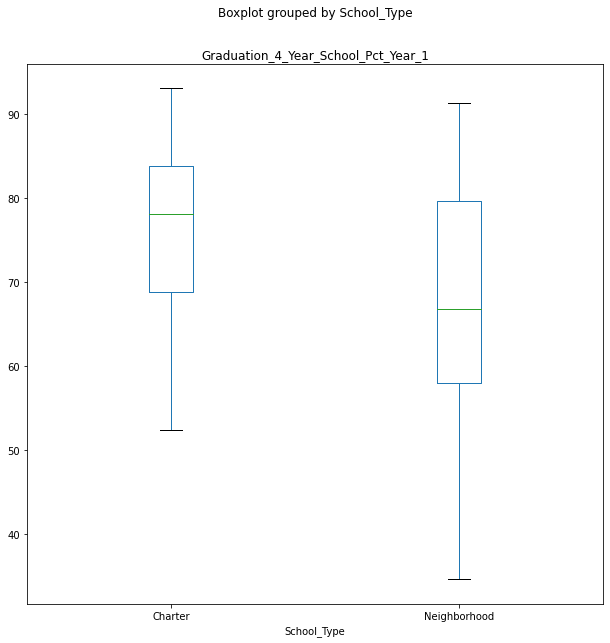

In [7]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Graduation_4_Year_School_Pct_Year_1"]]
bxp_df.boxplot("Graduation_4_Year_School_Pct_Year_1", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Grad41vST.png")

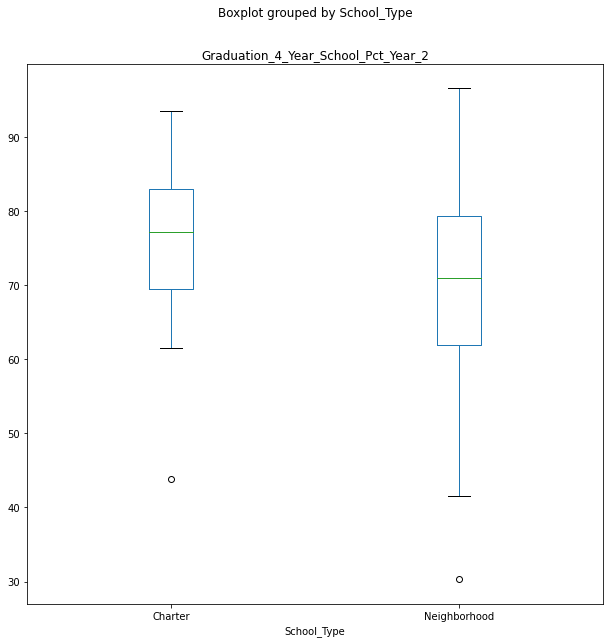

In [8]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Graduation_4_Year_School_Pct_Year_2"]]
bxp_df.boxplot("Graduation_4_Year_School_Pct_Year_2", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Grad42vST.png")

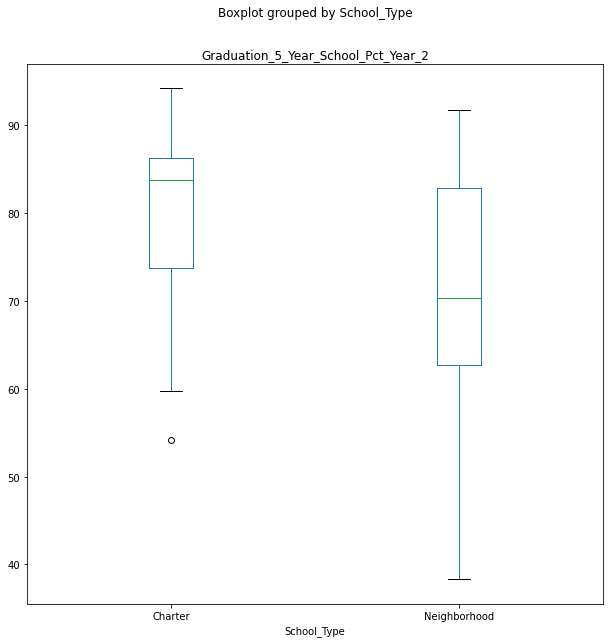

In [9]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Graduation_5_Year_School_Pct_Year_2"]]
bxp_df.boxplot("Graduation_5_Year_School_Pct_Year_2", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Grad52vST.png")

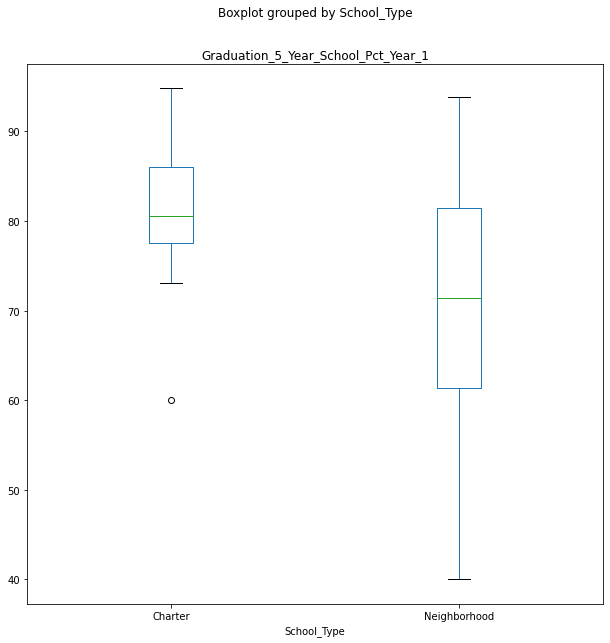

In [10]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Graduation_5_Year_School_Pct_Year_1"]]
bxp_df.boxplot("Graduation_5_Year_School_Pct_Year_1", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Grad51vST.png")

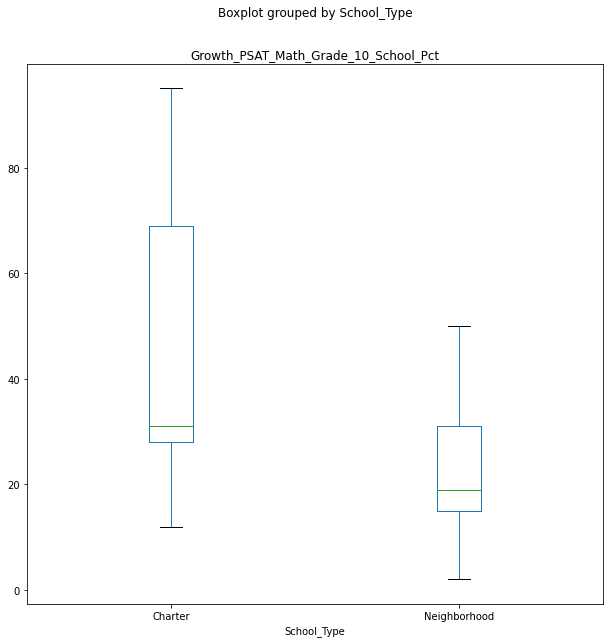

In [11]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Growth_PSAT_Math_Grade_10_School_Pct"]]
bxp_df.boxplot("Growth_PSAT_Math_Grade_10_School_Pct", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Growth10MathvST.png")

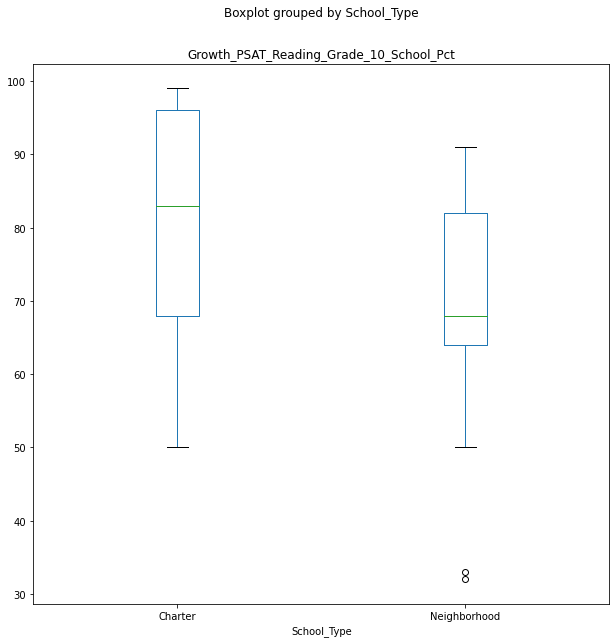

In [12]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Growth_PSAT_Reading_Grade_10_School_Pct"]]
bxp_df.boxplot("Growth_PSAT_Reading_Grade_10_School_Pct", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Growth10ReadvST.png")

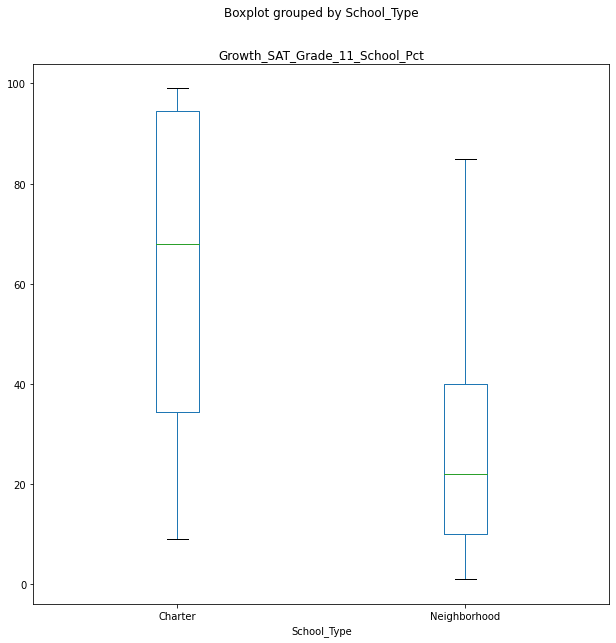

In [13]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Growth_SAT_Grade_11_School_Pct"]]
bxp_df.boxplot("Growth_SAT_Grade_11_School_Pct", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Growth11vST.png")

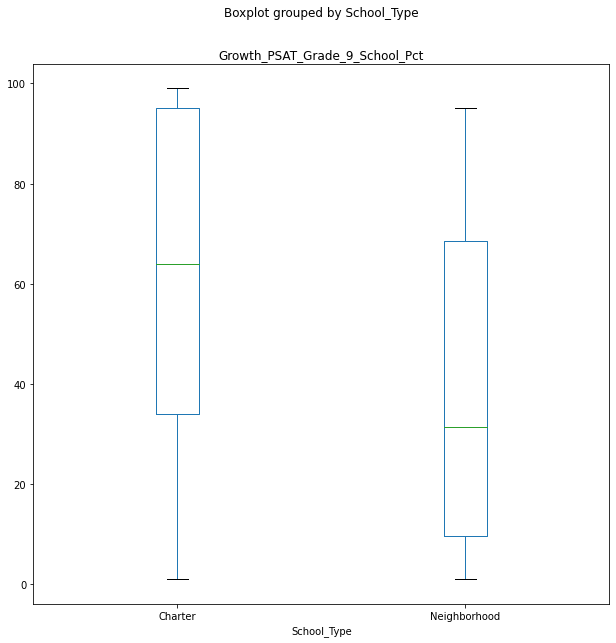

In [14]:
bxp_df = NeighborhoodVChart_high[["School_Type", "Growth_PSAT_Grade_9_School_Pct"]]
bxp_df.boxplot("Growth_PSAT_Grade_9_School_Pct", by = "School_Type", figsize =(10,10) , grid=False)
plt.savefig("Growth9vST.png")

## Is there a significant diference in teacher retention between Charter and Neighborhood schools?
null hypthesis: mu1 -mu2 = 0 
alternative hypothesis mu1-mu2 =/ 0

In [15]:
#Constructing a confidence interval
#separating by school type
Neighborhood_high = One_df.loc[(One_df['School_Type']== "Neighborhood")]
Charter_high = One_df.loc[(One_df['School_Type']== "Charter")]
#finding necessary values
mu1 = Neighborhood_high['Teacher_Retention'].mean()
std1 = Neighborhood_high['Teacher_Retention'].std()
n1 = Neighborhood_high['Teacher_Retention'].count()
mu2 = Charter_high['Teacher_Retention'].mean()
std2 = Charter_high['Teacher_Retention'].std()
n2 = Charter_high['Teacher_Retention'].count()

#the smaller of the two is the df
df = min(n1-1, n2-1)

t_crit = st.t.ppf(.95,df)
t_crit

Confidence_interval_ub = (mu1-mu2)+ t_crit * math.sqrt((std1/n1)+(std2/n2))
Confidence_interval_lb = (mu1-mu2)- t_crit * math.sqrt((std1/n1)+(std2/n2))

print(f'mu1 is {mu1} and mu2 is {mu2}')
print(f'The confidence interval for Teacher Retention is from {Confidence_interval_ub} and {Confidence_interval_lb}')




mu1 is 0.844871794871795 and mu2 is 0.4530434782608695
The confidence interval for Teacher Retention is from 0.615983390189514 and 0.16767324303233697


In [16]:
One_df['Attainment_SAT_Grade_11_School_Pct'] = pd.to_numeric(One_df['Attainment_SAT_Grade_11_School_Pct'])
Neighborhood_high = One_df.loc[(One_df['School_Type']== "Neighborhood")]

In [17]:
variables = ['Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct','Growth_PSAT_Math_Grade_10_School_Pct', 'Growth_SAT_Grade_11_School_Pct', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']


for var in variables: 
    mu1 = Neighborhood_high[var].mean()
    std1 = Neighborhood_high[var].std()
    n1 = Neighborhood_high[var].count()
    mu2 = Charter_high[var].mean()
    std2 = Charter_high[var].std()
    n2 = Charter_high[var].count()

    #the smaller of the two is the df
    df = min(n1-1, n2-1)

    t_crit = st.t.ppf(.95,df)
    

    Confidence_interval_ub = (mu1-mu2)+ t_crit * math.sqrt((std1/n1)+(std2/n2))
    Confidence_interval_lb = (mu1-mu2)- t_crit * math.sqrt((std1/n1)+(std2/n2))

    print(f'for {var} mu1 is {mu1} and mu2 is {mu2}')
    print(f'The confidence interval for {var} is from {Confidence_interval_ub} to {Confidence_interval_lb}')

#Keep line below

for Growth_PSAT_Grade_9_School_Pct mu1 is 39.666666666666664 and mu2 is 68.65217391304348
The confidence interval for Growth_PSAT_Grade_9_School_Pct is from -26.522893081454527 to -31.448121411299113
for Growth_PSAT_Reading_Grade_10_School_Pct mu1 is 68.56410256410257 and mu2 is 88.3913043478261
The confidence interval for Growth_PSAT_Reading_Grade_10_School_Pct is from -18.204588380809213 to -21.449815186637835
for Growth_PSAT_Math_Grade_10_School_Pct mu1 is 23.692307692307693 and mu2 is 47.82608695652174
The confidence interval for Growth_PSAT_Math_Grade_10_School_Pct is from -22.072991108358984 to -26.194567420069113
for Growth_SAT_Grade_11_School_Pct mu1 is 27.05128205128205 and mu2 is 68.95652173913044
The confidence interval for Growth_SAT_Grade_11_School_Pct is from -39.52417103535019 to -44.28630834034658
for Attainment_SAT_Grade_11_School_Pct mu1 is 20.715384615384615 and mu2 is 33.39565217391304
The confidence interval for Attainment_SAT_Grade_11_School_Pct is from -10.593015

In [18]:
# Perform the ANOVA
variables = ['Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct','Growth_PSAT_Math_Grade_10_School_Pct', 'Growth_SAT_Grade_11_School_Pct','Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']

for var in variables:
    group1 = Neighborhood_high[var]
    group2 = Charter_high[var]
    anova = st.f_oneway(group1, group2)
    print(f'anova for {var} is {anova}')

anova for Growth_PSAT_Grade_9_School_Pct is F_onewayResult(statistic=13.298462944898583, pvalue=0.0005572271801461254)
anova for Growth_PSAT_Reading_Grade_10_School_Pct is F_onewayResult(statistic=27.959838163898223, pvalue=1.8280608471581803e-06)
anova for Growth_PSAT_Math_Grade_10_School_Pct is F_onewayResult(statistic=24.50821127957191, pvalue=6.333755533621169e-06)
anova for Growth_SAT_Grade_11_School_Pct is F_onewayResult(statistic=38.112095652490254, pvalue=6.292511118100102e-08)
anova for Attainment_SAT_Grade_11_School_Pct is F_onewayResult(statistic=5.745039274157721, pvalue=0.019667153341529915)
anova for Attainment_PSAT_Grade_10_School_Pct is F_onewayResult(statistic=8.352211156307629, pvalue=0.005354691394657638)
anova for Attainment_PSAT_Grade_9_School_Pct is F_onewayResult(statistic=1.0171652077523146, pvalue=0.31724244926959705)
anova for Graduation_4_Year_School_Pct_Year_1 is F_onewayResult(statistic=10.25873015423438, pvalue=0.002178333383983586)
anova for Graduation_4_

## Attainment in Neighborhood Schools v Salary
Does Teacher Salary predict test scores?
# Hypotheses
Null Hypothesis: Teacher Salary will have no effect on Test Scores.
Alternative Hypothesis: Teacher Salary doesn't have no effect on Test Scores.

The correlation is 0.25529770106550764


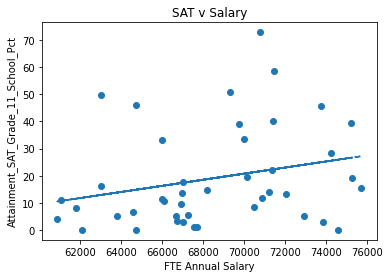

In [29]:
#11th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_SAT_Grade_11_School_Pct', ]]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_SAT_Grade_11_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_SAT_Grade_11_School_Pct')
plt.title('SAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')
plt.savefig("SATvSalary.png")

The correlation is 0.24210084279894326


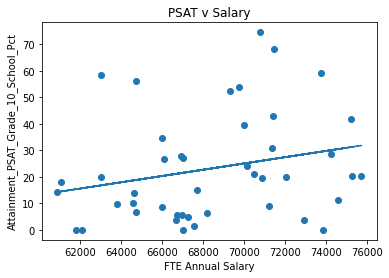

In [20]:
#10th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_10_School_Pct']]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_10_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_10_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.26631266450384394


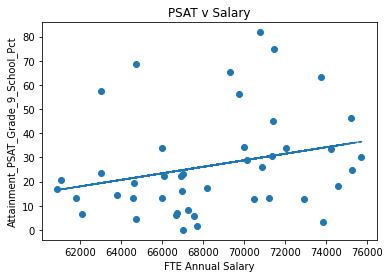

In [21]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_9_School_Pct']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_9_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_9_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict college enrollment?

The correlation is 0.3339362189282251


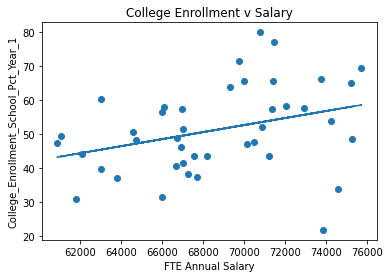

In [30]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_1')
plt.title('College Enrollment v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')
plt.savefig("CollegeEnvSalary.png")

The correlation is 0.2739568014907354


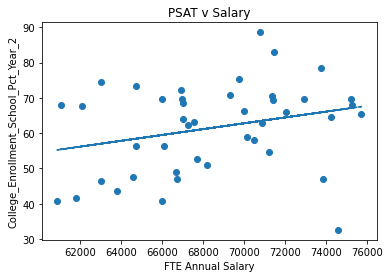

In [23]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_2']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_2']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_2')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict graduation rates?

The correlation is 0.30676443567574885


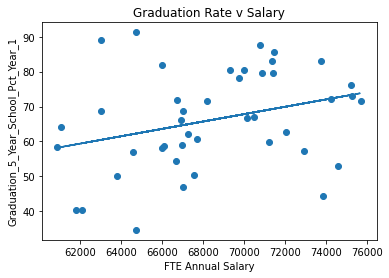

In [31]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_4_Year_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_4_Year_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_5_Year_School_Pct_Year_1')
plt.title('Graduation Rate v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')
plt.savefig("GradvSalary.png")

The correlation is 0.2229136034171567


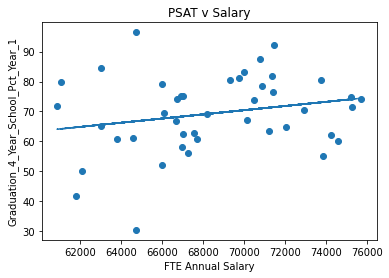

In [25]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_4_Year_School_Pct_Year_2']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_4_Year_School_Pct_Year_2']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_4_Year_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Is teacher pay different at neighborhood schools than schools you need to test into?

In [26]:
selection_df = pd.concat([Selective_high,Magnet_high])
Neighborhood_sal['FTE Annual Salary'].median()

67985.0

In [27]:
selection_df['FTE Annual Salary'].median()

70042.0

In [28]:
group1 = Neighborhood_sal['FTE Annual Salary']
group2 = selection_df['FTE Annual Salary']

anova = st.f_oneway(group1, group2)
print(f'anova for salaries is {anova}')

anova for salaries is F_onewayResult(statistic=0.7487487526265344, pvalue=0.38690511593004717)
